In [1]:
using QuantumToolbox
using PlotlyJS

# First-order phase transitions: single photon drive

Hamiltonian
$$ H = -\Delta a^{\dagger}a + \frac{U}{2}a^{\dagger}a^{\dagger}aa + F(a + a^{\dagger}) $$
with single-photon loss only. No symmetries.

In [9]:
# parameters
N = 100
Δ = 10.
U_tilde = 10.
F_tilde = 2.
g = 1.

# operators
a = destroy(N)
ad = create(N)

# collapse operators
c_ops = [sqrt(g)/2 * a];


In [10]:
# find the expectation value of ad*a in the steady state
F_tilde_values = range(0, 5, 100)
n_values = zeros(length(F_tilde_values))
for (i, F_tilde) in enumerate(F_tilde_values)
    H = -Δ * (ad * a) + (U_tilde/N)/2 * (ad * ad * a * a) + F_tilde*sqrt(N) * (ad + a)
    L = liouvillian(H, c_ops)
    ρ_ss = steadystate(L)
    n_values[i] = real(expect(ad * a, ρ_ss)) / N
end


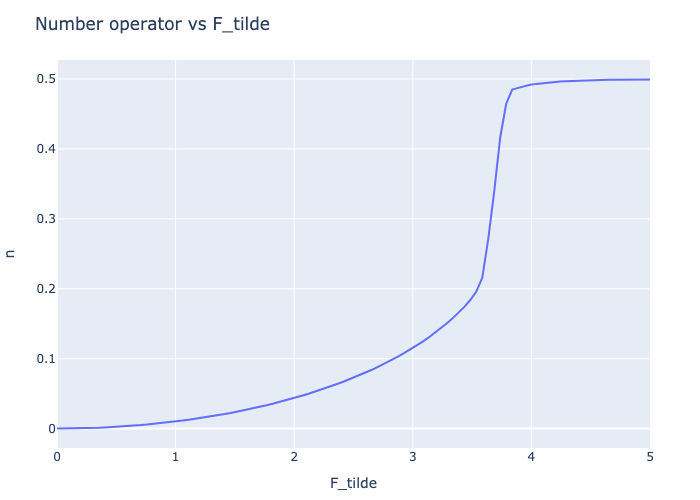

In [11]:
number_plot = scatter(x=F_tilde_values, y=n_values, mode="lines", name="number operator")
layout = Layout(title="Number operator vs F_tilde", xaxis_title="F_tilde", yaxis_title="n")
plot(number_plot, layout)

In [14]:
N = 50
U_tilde = 0.
F_tilde = 0.1
g = 1.

a = destroy(N)
ad = create(N)

# find the expectation value of ad*a in the steady state
Δ_values = range(-1, 1, 100)
n_values = zeros(length(Δ_values))
for (i, Δ) in enumerate(Δ_values)
    H = -Δ * (ad * a) + (U_tilde)/2 * (ad^2 * a^2) + F_tilde*sqrt(N) * (ad + a)
    c_ops = [sqrt(g)/2 * a];
    L = liouvillian(H, c_ops)
    ρ_ss = steadystate(L)
    n_values[i] = real(expect( ad*a, ρ_ss)) / N
end

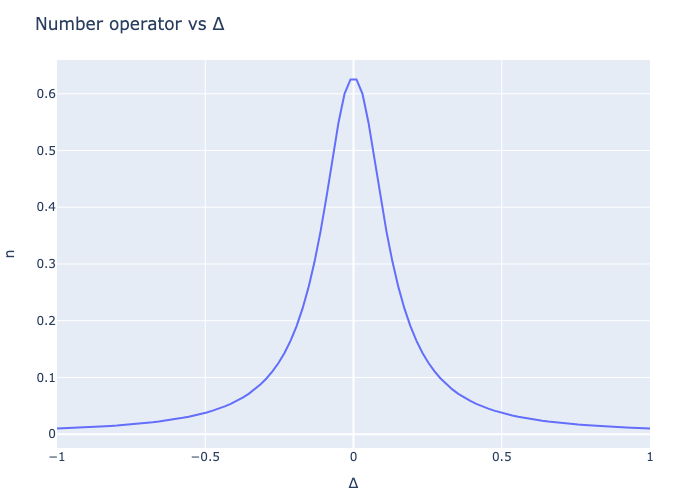

In [15]:
number_plot = scatter(x=Δ_values, y=n_values, mode="lines", name="number operator")
layout = Layout(title="Number operator vs Δ", xaxis_title="Δ", yaxis_title="n")
plot(number_plot, layout)

centred when there is no kerr nonlinearity

# Second-order phase transition: two-photon drive

In [21]:
# parameters
N = 30
Δ = 10.
U_tilde = 10.
eta_tilde = 1.
g = 1.

# operators
a = destroy(N)
ad = create(N)

# collapse operators
c_ops = [sqrt(g)/2 * a, sqrt(eta_tilde/N)/2*a^2];

In [22]:
# find the expectation value of ad*a in the steady state
G_values = range(0, 40, 100)
n_values = zeros(length(G_values))
for (i, G) in enumerate(G_values)
    H = -Δ * (ad * a) + (U_tilde/N)/2 * (ad * ad * a * a) + G * (ad^2 + a^2)
    c_ops = [sqrt(g)/2 * a, sqrt(eta_tilde/N)/2 * a^2];
    L = liouvillian(H, c_ops)
    ρ_ss = eigenstates(L)
    n_values[i] = real(expect(ad * a, ρ_ss)) / N
end

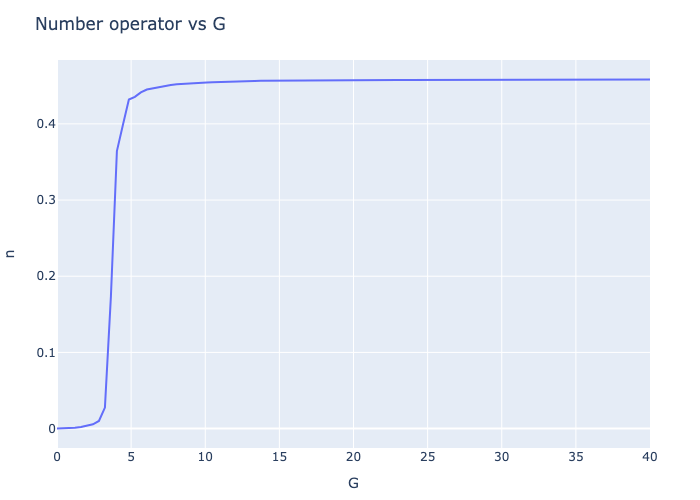

In [23]:
number_plot = scatter(x=G_values, y=n_values, mode="lines", name="number operator")
layout = Layout(title="Number operator vs G", xaxis_title="G", yaxis_title="n")
plot(number_plot, layout)

# Two-photon drive without kerr

In [28]:
# parameters
N = 10
ω = 1.
κ1 = 0.02
κϕ = 0.01

# operators
a = destroy(N)
ad = create(N)

# find the expectation value of a in the steady state
λ_values = range(0, 40, 100)
a_values = zeros(length(λ_values))
for (i, λ) in enumerate(λ_values)
    H = ω * (ad * a) + λ * (ad^2 + a^2)
    κ2 = λ/N
    c_ops = [sqrt(κ1) * a, sqrt(λ/N) * a^2, sqrt(κϕ) * ad * a];
    L = liouvillian(H, c_ops)
    ρ_ss = steadystate(L)
    a_values[i] = real(expect(a'*a, ρ_ss))
end

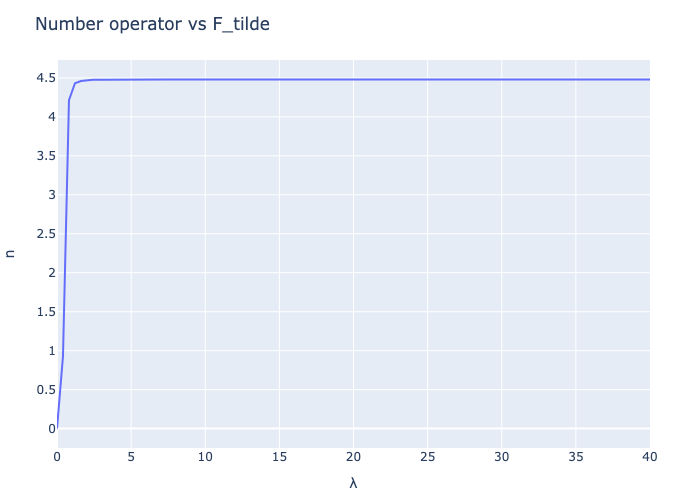

In [29]:
number_plot = scatter(x=λ_values, y=a_values, mode="lines", name="number operator")
layout = Layout(title="Number operator vs F_tilde", xaxis_title="λ", yaxis_title="n")
plot(number_plot, layout)

In the steady state, the 